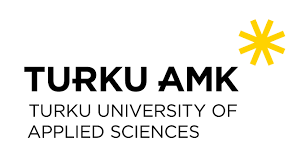           Created by Golnaz Sahebi, Introduction to Data Engineering, Autumn 2025

---

# Homework 02: Data Wrangling with Weather Data

**Data wrangling**, also known as data munging, is the process of cleaning, transforming, and organizing raw data into a structured and usable format for analysis. It involves tasks such as handling missing values, correcting data types, filtering, merging, and creating new features to prepare the data for further analysis or machine learning models. The goal of data wrangling is to make the data more consistent, accurate, and ready for meaningful insights.

This is an exercise for data wrangling using a fake generated weather dataset similar to a real weather dataset from Kaggle, which is bigger. This data is relatively simple and contains missing values that can be cleaned and transformed for analysis.

**Total points** you can earn from this assignment: **10**

## Problem Statement:

You are provided with weather data collected over multiple years. Your task is to clean, transform, and analyze this data, focusing on handling missing values and creating new features for analysis.

## Objectives:
This exercise provides a good mix of data wrangling tasks, including handling missing values, creating new features, and performing basic analysis on weather data.


#### - Download the Dataset:
- You can use the **'simulated_weather_data.csv'** file which is attached to this exercise file on ITS.

- Download the dataset file from your ItsLearning where this jupyter notebook is available.
#### - Specify the File Path in Your Code:

- Place the downloaded file in your working directory or specify the full path where the file is stored.

**Notes:** 
- **Relative Path:** If you place simulated_weather_data.csv in the same directory as your script or Jupyter Notebook, you can simply use 'US_Daily_Weather.csv'.

- **Absolute Path:** If the file is located elsewhere on your system, provide the full path, such as 'C:/Users/YourUsername/Downloads/simulated_weather_data.csv' for Windows or '/home/yourusername/Downloads/simulated_weather_data.csv' for Unix-based systems (Linux/MacOS).

By specifying the correct path, your code will be able to locate and load the dataset file properly.




## Assignment's Steps:
### 1. Load the Dataset (1 point)
- Load the weather dataset into a Pandas DataFrame.



In [93]:
# Import necessary libraries

import pandas as pd

# Load the dataset

df = pd.read_csv('simulated_weather_data.csv')

# Display the first few rows of the dataset

df.head()

,Date,Temperature (C),Humidity (%),Precipitation (mm),Wind Speed (km/h),Weather Condition,Visibility (km)
0,2023-01-01,29.1,89.4,14.2,59.5,Snowy,14.8
1,2023-01-02,1.7,73.9,5.8,68.7,Rainy,14.2
2,2023-01-03,-0.8,67.6,15.7,92.0,Snowy,17.2
3,2023-01-04,NaN,42.2,19.1,36.1,Sunny,10.6
4,2023-01-05,16.5,62.6,6.6,57.8,Rainy,8.7


### 2. Inspect the Data (1 point)
- Display the first few rows of the dataset.
- Check for missing values and data types.

In [94]:
# Check for missing values
df.isnull().sum()

Date                  0
Temperature (C)       2
Humidity (%)          1
Precipitation (mm)    4
Wind Speed (km/h)     0
Weather Condition     0
Visibility (km)       0
dtype: int64

In [95]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   Temperature (C)     363 non-null    float64
 2   Humidity (%)        364 non-null    float64
 3   Precipitation (mm)  361 non-null    float64
 4   Wind Speed (km/h)   365 non-null    float64
 5   Weather Condition   365 non-null    object 
 6   Visibility (km)     365 non-null    float64
dtypes: float64(5), object(2)
memory usage: 20.1+ KB


### 3. Handle Missing Data (2 points)
- Impute missing values for temperature and other numerical columns (e.g., precipitation, humidity) using the median.
- Drop rows with missing data if more than a certain threshold of values are missing.

In [96]:
# Fill missing values in numerical columns with the median value

df = df.fillna(df.median(numeric_only=True))

# Drop rows where more than half of the columns are missing 
# ! This was not reallt needed as after we fill ALL the null values with median, of course all will be filled so no need to the next question as it
# doesnt change anything

df = df.dropna(thresh = len(df.columns) / 2)

# Check again for missing values

print(df.isnull().sum())

Date                  0
Temperature (C)       0
Humidity (%)          0
Precipitation (mm)    0
Wind Speed (km/h)     0
Weather Condition     0
Visibility (km)       0
dtype: int64


In [97]:
df.isna().sum()

Date                  0
Temperature (C)       0
Humidity (%)          0
Precipitation (mm)    0
Wind Speed (km/h)     0
Weather Condition     0
Visibility (km)       0
dtype: int64

### 4. Data Transformation (2 points)
- Create a new column called Temp_Celsius that converts the temperature from Fahrenheit to Celsius.
- Create another column called IsDryDay to flag whether the day had no precipitation (i.e., precipitation == 0).

In [98]:
# Create new column 'Temp_Celsius' - Temperature is already in Celcius? I will make column called Temp_Fahrenheit and rename the original Temp_Celcius

df = df.rename(columns = {'Temperature (C)': 'Temp_Celsius'})
df['Temp_Fahrenheit'] = (df['Temp_Celsius'] * 9/5) + 32

# Create new column 'IsDryDay' (True if no precipitation, False otherwise)

df['IsDryDay'] = df['Precipitation (mm)'] == 0

# Display the new columns

df[['Temp_Fahrenheit', 'IsDryDay']]

,Temp_Fahrenheit,IsDryDay
0,84.38,False
1,35.06,False
2,30.56,False
3,56.12,False
4,61.70,False
...,...,...
360,61.88,False
361,65.48,False
362,91.94,False
363,53.06,False


In [99]:
#Checking if there are any dry days -  and there are 2
df['IsDryDay'].sum()

2

### 5. Analyze the Data (2 points)
- Calculate the average temperature in Celsius for each year.
- Find the number of dry days per year.

In [100]:
# Convert the 'date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the date

df['Year'] = df['Date'].dt.year

# Calculate the average temperature for each year. We only have 2023?

print(f"How many different Years do we have in this dataset? :{df['Year'].nunique()}\nSo only year 2023.\n") # answer is 1 so only 2023

print("Average temperature per year (2023) in C:")
avg_temp_per_year = (df.groupby('Year')['Temp_Celsius'].mean())
print(f"{avg_temp_per_year}\n")

# Calculate the number of dry days per year

print("Number of Dry Days per Year:")
dry_days_per_year = (df.groupby('Year')['IsDryDay'].sum())
print(dry_days_per_year)

How many different Years do we have in this dataset? :1
So only year 2023.

Average temperature per year (2023) in C:
Year
2023    13.255616
Name: Temp_Celsius, dtype: float64

Number of Dry Days per Year:
Year
2023    2
Name: IsDryDay, dtype: int64


### 6. Export the Cleaned Data (2 points)
- Export the cleaned and transformed data to a new CSV file.


In [101]:
import os

# Save the cleaned and transformed data to a new CSV file

df.to_csv('cleaned_weather_data.csv', index = False)


# Confirm the data has been saved

print(os.path.exists('cleaned_weather_data.csv'))

pd.read_csv('cleaned_weather_data.csv').head()

True


,Date,Temp_Celsius,Humidity (%),Precipitation (mm),Wind Speed (km/h),Weather Condition,Visibility (km),Temp_Fahrenheit,IsDryDay,Year
0,2023-01-01,29.1,89.4,14.2,59.5,Snowy,14.8,84.38,False,2023
1,2023-01-02,1.7,73.9,5.8,68.7,Rainy,14.2,35.06,False,2023
2,2023-01-03,-0.8,67.6,15.7,92.0,Snowy,17.2,30.56,False,2023
3,2023-01-04,13.4,42.2,19.1,36.1,Sunny,10.6,56.12,False,2023
4,2023-01-05,16.5,62.6,6.6,57.8,Rainy,8.7,61.70,False,2023


## Expected Output:

- The dataset should now have no missing values in the temperature, precipitation, and humidity columns.
- Two new columns: Temp_Celsius (temperature in Celsius) and IsDryDay (True/False for dry days).
- A summary showing the average temperature per year and the number of dry days per year.

